In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime , date

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Customer Address Data from the excel file
cust_address = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerAddress')

In [4]:
cust_address.shape

(3999, 6)

In [5]:
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
cust_address.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [7]:
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [8]:
cust_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [9]:
cust_address.describe(include='object')

,address,state,country
count,3999,3999,3999
unique,3996,5,1
top,3 Mariners Cove Terrace,NSW,Australia
freq,2,2054,3999


In [10]:
cust_address.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

In [11]:
# Total Records
print("Total records (rows) in the dataset : {}".format(cust_address.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_address.shape[1]))

Total records (rows) in the dataset : 3999
Total columns (features) in the dataset : 6


## 1. Missing Values Check

In [12]:
# Total number of missing values
cust_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

**In the dataset there are no missing values.**

<Axes: >

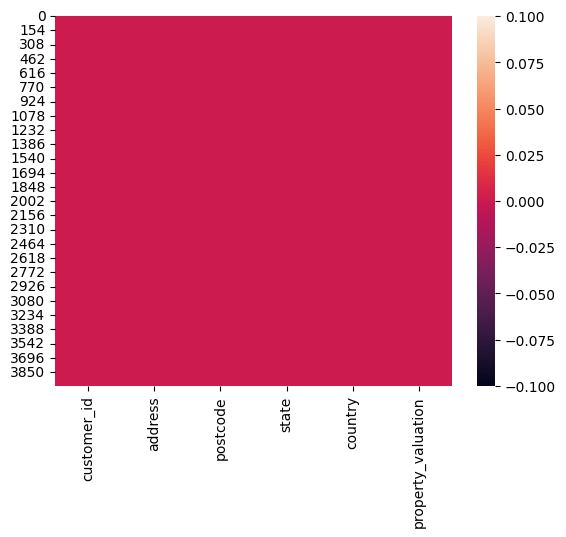

In [13]:
sns.heatmap(cust_address.isnull())

## 2. Inconsistency Check in Data

### 2.1 State

In [14]:
cust_address['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [15]:
# Function to replace full state names with their short forms.

def replace_state_names(state):
    
    if state == 'New South Wales' :
        return 'NSW'  
    elif state =='Victoria' :
        return 'VIC'   
    else :
        return state

# Applying the above fuction to state column

cust_address['state'] = cust_address['state'].apply(replace_state_names)

*The Other way is to use Lambda funtion*

In [16]:
# cust_address['state'] = cust_address['state'].apply(lambda x : x.replace('New South Wales', 'NSW'))
# cust_address['state'] = cust_address['state'].apply(lambda x : x.replace('Victoria ', 'VIC'))

In [17]:
cust_address['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [18]:
cust_address.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

### 2.2 Country

In [19]:
cust_address['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

### 2.3 Postcode

In [20]:
cust_address[['postcode','address','state', 'country']].drop_duplicates()

,postcode,address,state,country
0,2016,060 Morning Avenue,NSW,Australia
1,2153,6 Meadow Vale Court,NSW,Australia
2,4211,0 Holy Cross Court,QLD,Australia
3,2448,17979 Del Mar Point,NSW,Australia
4,3216,9 Oakridge Court,VIC,Australia
...,...,...,...,...
3994,3064,1482 Hauk Trail,VIC,Australia
3995,4511,57042 Village Green Point,QLD,Australia
3996,2756,87 Crescent Oaks Alley,NSW,Australia
3997,4032,8194 Lien Street,QLD,Australia


## 3. Duplication Checks 

For checking duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [21]:
# Dropping the primary key column i.e customer_id and storing into a temporary dataframe.
cust_address_dedupped = cust_address.drop('customer_id', axis=1).drop_duplicates()

In [22]:
print("Number of records after removing customer_id, duplicates : {}". format(cust_address_dedupped.shape[0]))
print("Number of records in original dataset : {}". format(cust_address.shape[0]))

Number of records after removing customer_id, duplicates : 3999
Number of records in original dataset : 3999


**Since both the numbers are same. There are no duplicate records in the dataset**

## 4. Outlier Check

<Axes: >

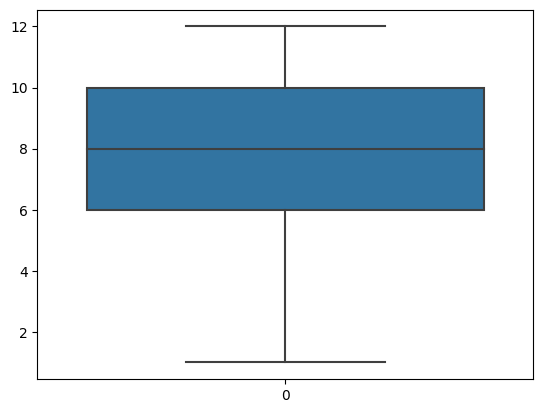

In [23]:
sns.boxplot(cust_address['property_valuation'])

In [1]:
# Exporting the Cleaned Customer Address Data Set to csv
cust_address.to_csv('CustomerAddess_Cleaned.csv', index=False)

NameError: name 'cust_address' is not defined